In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Dict
import torch
from torch import Tensor
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

from common import data
from common import metrics
from common.training import get_predictions

c:\Users\Zumo\anaconda3\envs\torch-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Zumo\anaconda3\envs\torch-gpu\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Zumo\anaconda3\envs\torch-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Hyperparameters

In [3]:
horizon = 1024
stride = 512
batch_size=16

@torch.no_grad()
def predict(batch: Dict[str, Tensor]) -> Tensor:
    inputs = batch["data"]
    bs, ts, _ = inputs.size()
    return torch.randn((bs, ts))

# Datasets

In [4]:
paths = data.get_dataset_paths("../data")
train, test = train_test_split(paths, test_size=0.1, random_state=42)


In [5]:
m_data_test = data.Marconi100Dataset(test, scaling=data.Scaling.STANDARD)


Loading: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s]


In [6]:
test_loader = DataLoader(
    data.UnfoldedDataset(m_data_test, horizon=horizon, stride=stride),
    batch_size,
    shuffle=False,
)


# Evaluating

In [7]:
# Cost model
cmodel = metrics.default_cmodel()


In [8]:
scores, labels = get_predictions(predict, test_loader)


100%|██████████| 41/41 [00:03<00:00, 10.32it/s]


In [9]:
cmodel.fit(scores, labels).optimize()


(1.5306067609787144, 0.104388036)

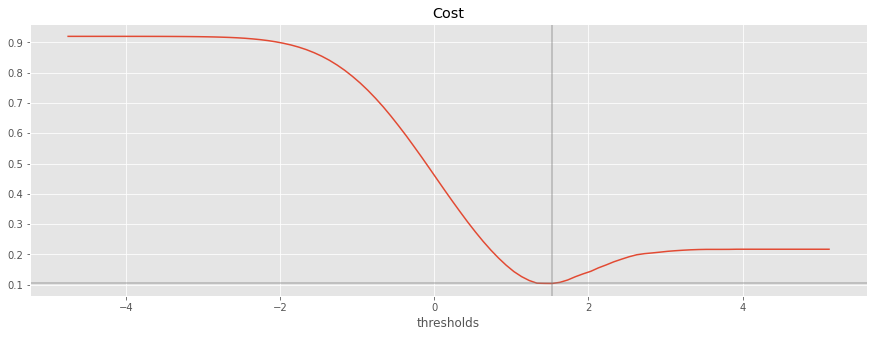

In [10]:
metrics.plot_cost(cmodel)


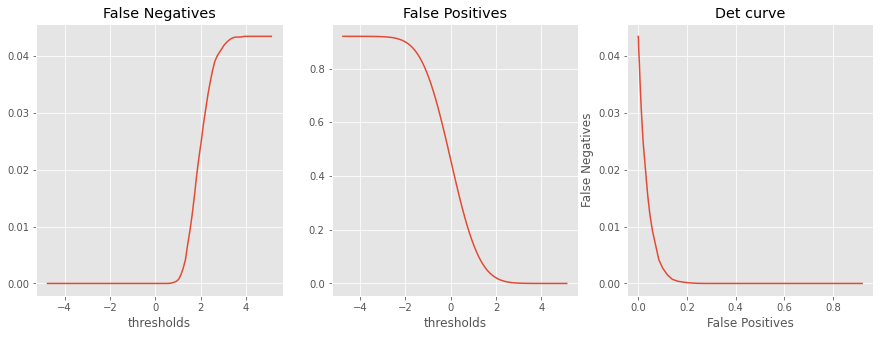

In [11]:
metrics.plot_errors_curve(
    cmodel.false_positives, cmodel.false_negatives, cmodel.thresholds, figsize=(15, 5)
)


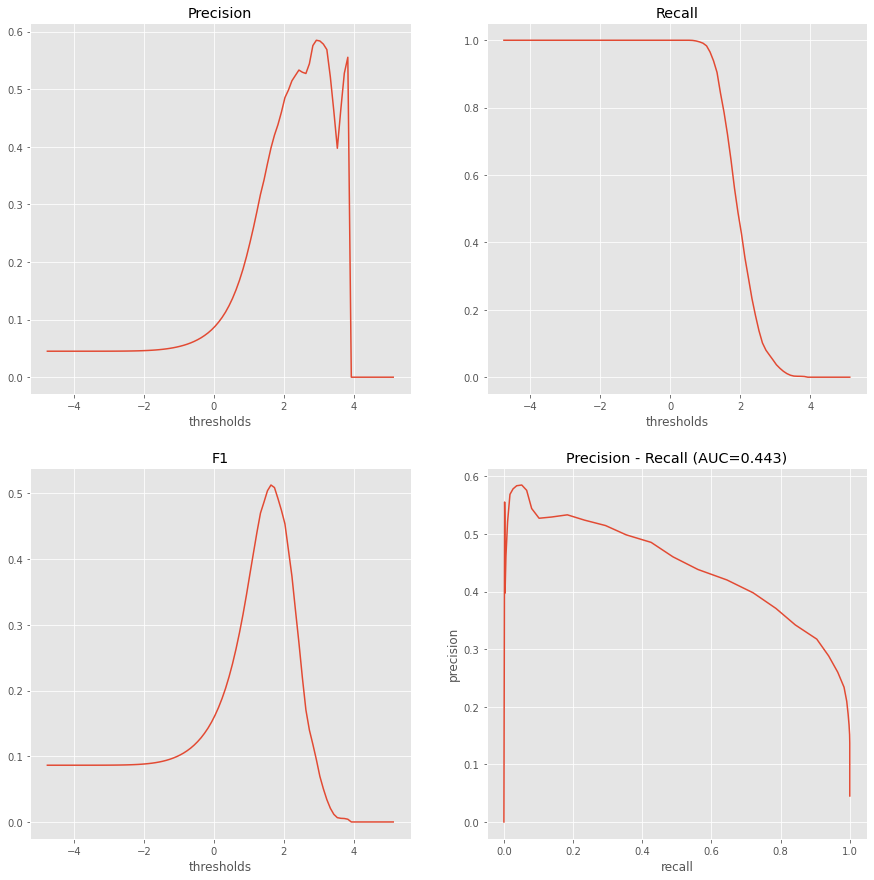

In [12]:
pr, rec, f1 = metrics.precision_recall_f1(
    cmodel.false_positives, cmodel.false_negatives
)
metrics.plot_precision_recall_f1_curve(pr, rec, f1, cmodel.thresholds)
